In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y, coef = datasets.make_regression(n_samples=500, 
                                      n_features=5, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
X

array([[ 0.20838281, -2.04173487, -1.00162001, -0.24717738, -0.68198425],
       [ 0.33849641, -0.41528791,  0.18186626,  0.63278187,  2.27069286],
       [ 0.85958789, -0.38713065, -1.91967316, -0.04541122,  0.02538842],
       ...,
       [-0.48423407,  1.26691115,  0.77463405, -0.70766947,  0.44381943],
       [ 0.25049285,  0.34644821,  0.29307247, -0.68002472,  0.2322537 ],
       [-0.55749179, -1.36980298, -0.80367457, -0.08828205,  2.57970934]])

In [4]:
X.shape

(500, 5)

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
# Метод градиентного спуска
eval_GD_dict = {}

def eval_GD(X, y, iterations, alpha=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        eval_GD_dict[i] = err

    return w

In [7]:
%%time

eval_GD(X, y, iterations=3000, alpha=1e-3)

Wall time: 83.4 ms


array([81.05836008, 68.24860894,  0.31748521,  0.09128975, -0.19645368])

In [8]:
eval_SGD_dict = {}

def eval_SGD(X, y, iterations, alpha=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        err = calc_mse(y[ind], y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y[ind]), X[ind]))
        eval_SGD_dict[i] = err 

    return w

In [9]:
%%time

eval_SGD(X, y, iterations=3000, alpha=1e-3) # 73.8595179617141

Wall time: 80.4 ms


array([ 1.39550396,  0.71281911,  0.62497512,  1.60361064, -0.24702659])

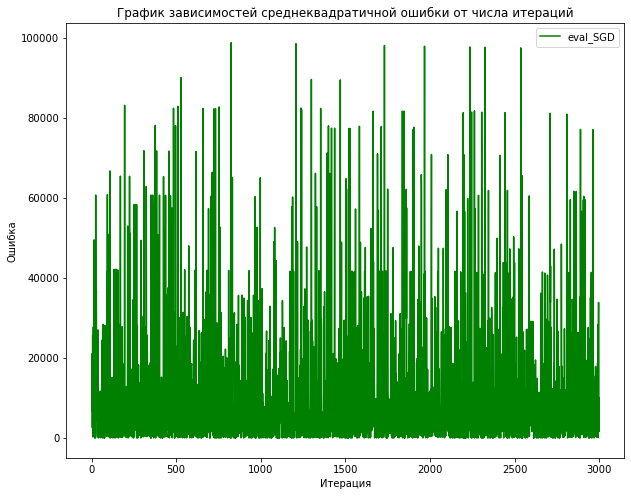

In [10]:
fig = plt.figure(figsize=(10,8))

eval_SGD = plt.plot(eval_SGD_dict.keys(), eval_SGD_dict.values(), color='green', label = 'eval_SGD')

plt.title('График зависимостей среднеквадратичной ошибки от числа итераций')
plt.legend()
plt.xlabel('Итерация')
plt.ylabel('Ошибка')

plt.show()

Добавлять в общий график не буду, т.к. тут хаос)))

In [11]:
# mini-batch градиаентный спуск
eval_mbGD_dict = {}

def eval_mbGD(X, y, iterations, qty_in_batch=1, alpha=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
#     print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
            eval_mbGD_dict[i] = err
            
    return w

In [12]:
%%time

eval_mbGD(X, y, iterations=3000, qty_in_batch=3, alpha=1e-3) 

Wall time: 7.12 s


array([81.05690323, 68.24805837,  0.31749512,  0.0916397 , -0.19660704])

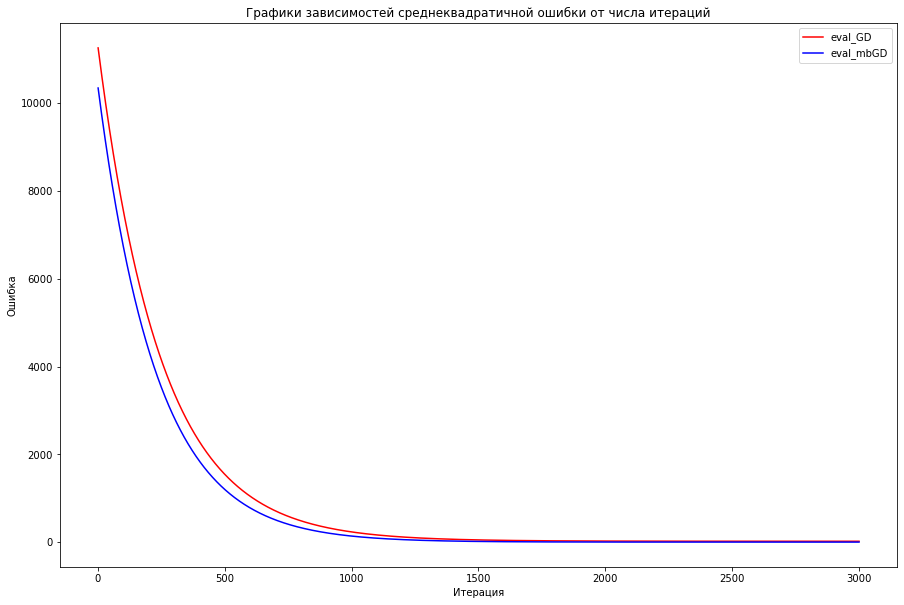

In [13]:
fig = plt.figure(figsize=(15,10))

eval_GD = plt.plot(eval_GD_dict.keys(), eval_GD_dict.values(), color='red', label = 'eval_GD')
# eval_SGD = plt.plot(eval_SGD_dict.keys(), eval_SGD_dict.values(), color='green', label = 'eval_SGD')
eval_mbGD = plt.plot(eval_mbGD_dict.keys(), eval_mbGD_dict.values(), color='blue', label = 'eval_mbGD')

plt.title('Графики зависимостей среднеквадратичной ошибки от числа итераций')
plt.legend()
plt.xlabel('Итерация')
plt.ylabel('Ошибка')

plt.show()

Вывод: скорость сходимости градиентного спуска медленнее, чем mini-batch градиентного спуска с числом батчей 3 шт.

## L2 регуляризация - Ridge

Добавим L2 регулиризацию в оба алгоритма

In [49]:
eval_GD_reg2_dict = {}

def eval_GD_reg2(X, y, iterations, alpha=1e-3, lambda_=1e-2):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        eval_GD_reg2_dict[i] = err
        
    return w

In [50]:
# mini-batch градиаентный спуск
eval_mbGD_reg2_dict = {}

def eval_mbGD_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-3, lambda_=1e-2):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
#     print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w)
            eval_mbGD_reg2_dict[i] = err
            
    return w

In [51]:
eval_GD_reg2(X, y, iterations=3000, alpha=1e-3, lambda_=1e-3)

array([80.973949  , 68.1860938 ,  0.31764269,  0.09645444, -0.19804824])

In [52]:
eval_mbGD_reg2(X, y, iterations=3000, qty_in_batch=3, alpha=1e-3, lambda_=1e-3) 

array([68.98838154, 59.16609496,  0.33651058,  0.73399207, -0.39713089])

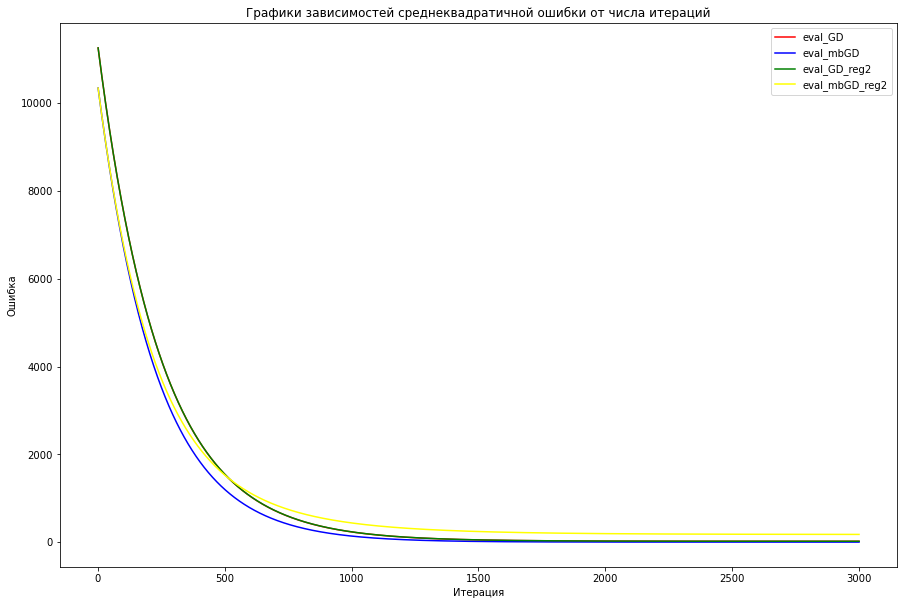

In [53]:
fig = plt.figure(figsize=(15,10))

#без регуляризации
eval_GD = plt.plot(eval_GD_dict.keys(), eval_GD_dict.values(), color='red', label = 'eval_GD')
eval_mbGD = plt.plot(eval_mbGD_dict.keys(), eval_mbGD_dict.values(), color='blue', label = 'eval_mbGD')

#с регуляризацией
eval_GD_reg2 = plt.plot(eval_GD_reg2_dict.keys(), eval_GD_reg2_dict.values(), color='green', label = 'eval_GD_reg2')
eval_mbGD_reg2 = plt.plot(eval_mbGD_reg2_dict.keys(), eval_mbGD_reg2_dict.values(), color='yellow', label = 'eval_mbGD_reg2')

plt.title('Графики зависимостей среднеквадратичной ошибки от числа итераций')
plt.legend()
plt.xlabel('Итерация')
plt.ylabel('Ошибка')

plt.show()

Вывод: с L2 регуляризацией сходимость алгоритма градиентного спуска с mini-batch - уменьшилась, видимо модель сильно штрафует за неправильные ответы. Алгоритм обычного градиетного спуска с регуляризацией и без выдал одинаковые результаты. Быстрее всего с задачей справился алгоритм градиентного спуска с mini-batch без регуляризации

## L1 регуляризация - Lasso

In [75]:
eval_GD_reg1_dict = {}

def eval_GD_reg1(X, y, iterations, alpha=1e-3, lambda_=1e-2):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * w / abs(w))
        eval_GD_reg1_dict[i] = err
        
    return w

In [78]:
eval_mbGD_reg1_dict = {}

def eval_mbGD_reg1(X, y, iterations, qty_in_batch=1, alpha=1e-3, lambda_=1e-2):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
#     print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w)
            eval_mbGD_reg1_dict[i] = err
            
    return w

In [76]:
eval_GD_reg1(X, y, iterations=3000, alpha=1e-3, lambda_=1e-3)

array([81.0578392 , 68.24819522,  0.31702251,  0.09078629, -0.19594053])

In [79]:
eval_mbGD_reg1(X, y, iterations=3000, qty_in_batch=3, alpha=1e-3, lambda_=1e-3) 

array([68.98838154, 59.16609496,  0.33651058,  0.73399207, -0.39713089])

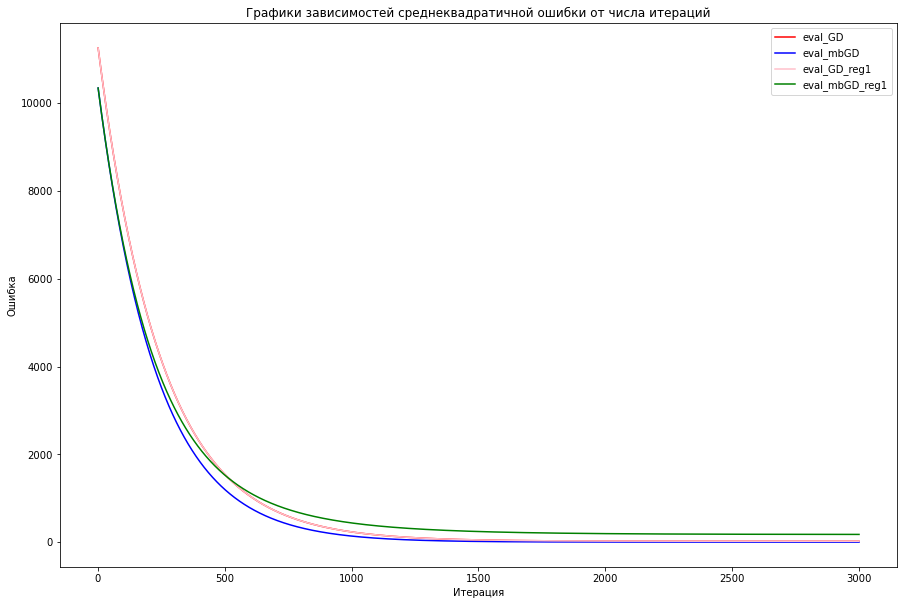

In [83]:
fig = plt.figure(figsize=(15,10))

eval_GD = plt.plot(eval_GD_dict.keys(), eval_GD_dict.values(), color='red', label = 'eval_GD')
eval_mbGD = plt.plot(eval_mbGD_dict.keys(), eval_mbGD_dict.values(), color='blue', label = 'eval_mbGD')
# eval_GD_reg2 = plt.plot(eval_GD_reg2_dict.keys(), eval_GD_reg2_dict.values(), color='green', label = 'eval_GD_reg2')
# eval_mbGD_reg2 = plt.plot(eval_mbGD_reg2_dict.keys(), eval_mbGD_reg2_dict.values(), color='yellow', label = 'eval_mbGD_reg2')
eval_GD_reg1 = plt.plot(eval_GD_reg1_dict.keys(), eval_GD_reg1_dict.values(), color='pink', label = 'eval_GD_reg1')
eval_mbGD_reg1 = plt.plot(eval_mbGD_reg1_dict.keys(), eval_mbGD_reg1_dict.values(), color='green', label = 'eval_mbGD_reg1')



plt.title('Графики зависимостей среднеквадратичной ошибки от числа итераций')
plt.legend()
plt.xlabel('Итерация')
plt.ylabel('Ошибка')

plt.show()

Вывод: быстрее всего сошелся алгоритм градиентного спуска с mini-batch без регуляризации, примерно на 2000 итераций классический алгоритм градиентного бустинга с L1 регуляризацией показал аналогичный результат.